In [1]:
import numpy as np
import pandas as pd
from data_pre import data_normalize
import warnings
warnings.filterwarnings('ignore')

In [2]:
d = pd.read_excel(r"D:\program\pycharm\model\Data\新训练.xlsx", sheet_name='Sheet3')
d

,WD,WLC,WLA,WIA,TD,TI,UCS,MTL,TN,ATI,TBD
0,1,1,0.000,0.000,1.360,1.290,52.64,0.2,2.0,0.68,11.0
1,4,1,10.100,12.350,99.120,26.890,10.20,0.5,7.0,0.55,20.0
2,3,3,8.900,10.230,63.440,18.640,32.00,1.2,15.0,0.32,40.0
3,2,2,4.300,6.010,35.660,11.560,50.56,1.7,18.0,0.10,350.0
4,2,1,0.000,0.000,2.360,3.570,60.25,1.4,14.0,0.18,221.0
...,...,...,...,...,...,...,...,...,...,...,...
146,2,2,16.858,8.028,56.476,10.459,11.94,NaN,NaN,NaN,NaN
147,4,3,7.214,3.461,65.889,25.101,21.86,NaN,NaN,NaN,NaN
148,3,3,22.491,2.869,30.330,11.504,16.99,NaN,NaN,NaN,NaN
149,2,4,24.662,6.223,89.944,21.963,7.29,NaN,NaN,NaN,NaN


In [3]:
data = data_normalize(d, 'WD')
df = data.fillna_by_random()
df

,WD,WLC,WLA,WIA,TD,TI,UCS,MTL,TN,ATI,TBD
0,1,1,0.000,0.000,1.360,1.290,52.64,0.200,2.0,0.6800,11.0
1,4,1,10.100,12.350,99.120,26.890,10.20,0.500,7.0,0.5500,20.0
2,3,3,8.900,10.230,63.440,18.640,32.00,1.200,15.0,0.3200,40.0
3,2,2,4.300,6.010,35.660,11.560,50.56,1.700,18.0,0.1000,350.0
4,2,1,0.000,0.000,2.360,3.570,60.25,1.400,14.0,0.1800,221.0
...,...,...,...,...,...,...,...,...,...,...,...
146,2,2,16.858,8.028,56.476,10.459,11.94,1.770,13.0,0.5600,196.0
147,4,3,7.214,3.461,65.889,25.101,21.86,0.544,17.0,0.0920,204.0
148,3,3,22.491,2.869,30.330,11.504,16.99,1.015,12.0,0.5100,111.0
149,2,4,24.662,6.223,89.944,21.963,7.29,1.420,14.0,0.2300,264.0


In [4]:
d.describe()

,WD,WLC,WLA,WIA,TD,TI,UCS,MTL,TN,ATI,TBD
count,151.000000,151.000000,151.000000,151.000000,151.000000,147.000000,147.000000,93.000000,50.000000,50.000000,95.000000
mean,3.006623,2.337748,6.436119,4.441589,44.399728,10.299082,30.621497,1.258215,14.520000,0.227740,202.336842
std,0.969513,1.159813,6.276364,3.363534,28.666490,7.384083,16.980676,0.417839,4.394988,0.189039,91.263426
min,1.000000,1.000000,0.000000,0.000000,1.046000,0.000000,3.240000,0.200000,2.000000,0.050000,11.000000
25%,2.000000,1.000000,0.790000,2.015000,24.370000,3.931500,16.285000,0.972000,12.250000,0.094000,134.000000
50%,3.000000,2.000000,6.040000,3.620000,39.743000,9.413000,32.570000,1.270000,16.000000,0.155000,204.000000
75%,4.000000,3.000000,10.142500,6.480000,65.115000,15.890000,45.220000,1.575000,18.000000,0.225000,265.000000
max,5.000000,5.000000,26.593000,12.350000,106.530000,27.350000,66.850000,1.890000,20.000000,0.680000,367.000000


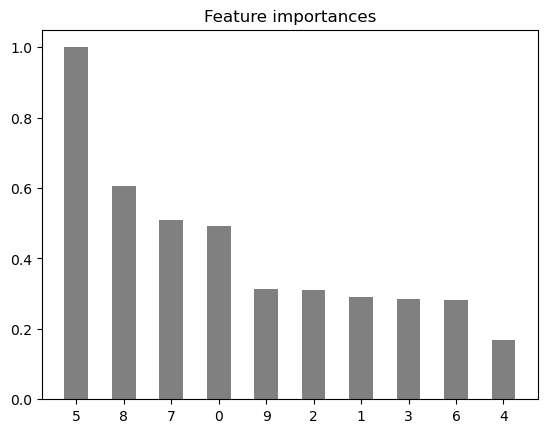

In [6]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
from model.UniVarSelector import UniVarSelector
%matplotlib inline
uni = UniVarSelector(X, y)
uni.fit()
uni.plot()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
aver = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-aver)/std
X_test = (X_test-aver)/std
X_train.describe()

,WLC,WLA,WIA,TD,TI,UCS,MTL,TN,ATI,TBD
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,2.960595e-17,1.896631e-16,3.515706e-17,-5.255056e-16,2.535009e-16,1.010303e-15,1.147230e-16,-1.054712e-16,2.525757e-16,-1.128727e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.109776e+00,-9.700031e-01,-1.312741e+00,-1.533542e+00,-1.382026e+00,-1.656693e+00,-2.589082e+00,-3.002447e+00,-9.215850e-01,-2.253142e+00
25%,-1.109776e+00,-9.083312e-01,-7.223880e-01,-6.749454e-01,-8.708461e-01,-8.381287e-01,-7.096855e-01,-4.635045e-01,-6.566221e-01,-7.104811e-01
50%,-2.278348e-01,-2.863487e-01,-1.954969e-01,-2.593409e-01,-8.286442e-02,-7.003306e-03,5.970747e-02,3.040826e-01,-3.916593e-01,-7.713306e-03
75%,6.541063e-01,6.203065e-01,6.375004e-01,7.585958e-01,5.455040e-01,8.766095e-01,8.079633e-01,7.764439e-01,-7.370383e-02,7.521901e-01
max,2.417989e+00,3.098456e+00,2.557656e+00,2.349507e+00,2.422263e+00,2.148121e+00,1.493412e+00,2.134483e+00,2.589173e+00,1.814912e+00


In [23]:
clf = MLPClassifier(
    hidden_layer_sizes=(10, 15, 10),
    alpha=1e-4,
    random_state=2,
    max_iter=1000,
    learning_rate='constant',
    solver='sgd',
    verbose=True,
    activation='relu',
    learning_rate_init=0.01
)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
ypred = clf.predict(X_train)
from sklearn import metrics
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)             # 训练

    print ("训练集精度:")   # 训练集精度
    print (clf.score(X_train, y_train))

    print ("\n测试集精度:")    # 测试集精度
    print (clf.score(X_test, y_test))

    y_pred = clf.predict(X_test)

    print ("\n分类识别报告:")      # 分类识别报告
    print (metrics.classification_report(y_test, y_pred))

    # print ("\n混淆矩阵:")
    # print (metrics.confusion_matrix(y_test, y_pred))
train_and_evaluate(clf, X_train, X_test, y_train, y_test)

Iteration 1, loss = 1.83520719
Iteration 2, loss = 1.80572758
Iteration 3, loss = 1.76680280
Iteration 4, loss = 1.72196467
Iteration 5, loss = 1.67428715
Iteration 6, loss = 1.62584759
Iteration 7, loss = 1.57927693
Iteration 8, loss = 1.53680862
Iteration 9, loss = 1.49956472
Iteration 10, loss = 1.46783832
Iteration 11, loss = 1.44086382
Iteration 12, loss = 1.41772985
Iteration 13, loss = 1.39760680
Iteration 14, loss = 1.37848869
Iteration 15, loss = 1.36046145
Iteration 16, loss = 1.34462216
Iteration 17, loss = 1.33042001
Iteration 18, loss = 1.31734753
Iteration 19, loss = 1.30540780
Iteration 20, loss = 1.29442975
Iteration 21, loss = 1.28405887
Iteration 22, loss = 1.27412663
Iteration 23, loss = 1.26473637
Iteration 24, loss = 1.25564372
Iteration 25, loss = 1.24652687
Iteration 26, loss = 1.23754853
Iteration 27, loss = 1.22875059
Iteration 28, loss = 1.21994476
Iteration 29, loss = 1.21110469
Iteration 30, loss = 1.20229059
Iteration 31, loss = 1.19356234
Iteration 32, los

In [36]:
X_train.iloc[:2, :]

,WLC,WLA,WIA,TD,TI,UCS,MTL,TN,ATI,TBD
81,-1.109776,-0.970003,-0.924134,-1.195463,1.086602,1.431601,0.327607,0.320241,-0.608557,-0.089019
101,1.536047,1.161723,0.154249,-0.109039,-0.665319,-1.589673,-1.685142,-1.875696,-0.776506,-1.133663


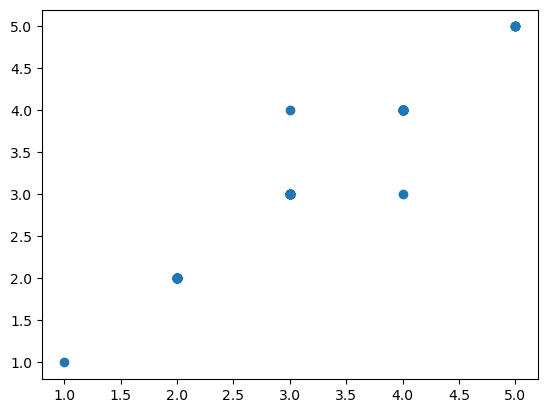

In [40]:
tar_train = clf.predict(X_train).tolist()
plt.scatter(tar_train, y_train)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
# from keras.optimizers import lbfgs

y_train_, y_test_ = y_train - 1, y_test - 1
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(units=20, activation="relu", name="layer1", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=15, activation="relu", name="layer2", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=10, activation="relu", name="layer3", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=5, activation="linear", name="layer4", kernel_regularizer=tf.keras.regularizers.l2(0.001))
    ], name="model"
)

model.compile(
    loss=SparseCategoricalCrossentropy(from_logits = True),
    # optimizer=tf.keras.optimizers.Adam(0.001),
    optimizer=SGD(momentum=0.5, decay=0.005),
    metrics=['Accuracy']
)

history = model.fit(
    X_train, y_train_,
    epochs = 1000,
    validation_data=(X_test, y_test_)
)

Epoch 1/1000
4/4 [==============================] - 1s 89ms/step - loss: 1.7672 - Accuracy: 0.2083 - val_loss: 1.7761 - val_Accuracy: 0.1935
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.7224 - Accuracy: 0.2583 - val_loss: 1.7362 - val_Accuracy: 0.1935
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.6840 - Accuracy: 0.3000 - val_loss: 1.7031 - val_Accuracy: 0.1935
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.6512 - Accuracy: 0.3083 - val_loss: 1.6775 - val_Accuracy: 0.1613
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.6232 - Accuracy: 0.3083 - val_loss: 1.6557 - val_Accuracy: 0.1613
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.5982 - Accuracy: 0.3250 - val_loss: 1.6360 - val_Accuracy: 0.1935
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.5753 - Accuracy: 0.3250 - val_loss: 1.6190 - val_Accuracy: 0.2581
Epoch 8/1000


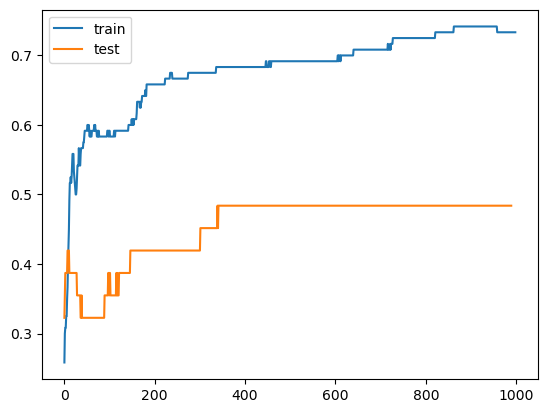

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['Accuracy'][1:], label='train')           #制作训练集准确率图
plt.plot(history.history['val_Accuracy'][10:], label='test')     #制作测试集准确率图
plt.legend()
plt.show()

In [47]:
# for 
clf = MLPClassifier(
    hidden_layer_sizes=(15, 15, 10, 5),
    alpha=0.01,
    random_state=2,
    max_iter=1000,
    learning_rate='constant',
    # learning_rate='adaptive',
    solver='sgd',
    verbose=True,
    activation='relu',
    learning_rate_init=0.005
)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
ypred = clf.predict(X_train)
print ("训练集精度:")   # 训练集精度
print (clf.score(X_train, y_train))

print ("\n测试集精度:")    # 测试集精度
print (clf.score(X_test, y_test))

Iteration 1, loss = 1.95948383
Iteration 2, loss = 1.94159254
Iteration 3, loss = 1.91721170
Iteration 4, loss = 1.88800191
Iteration 5, loss = 1.85540184
Iteration 6, loss = 1.82121955
Iteration 7, loss = 1.78714166
Iteration 8, loss = 1.75415720
Iteration 9, loss = 1.72245421
Iteration 10, loss = 1.69304647
Iteration 11, loss = 1.66627423
Iteration 12, loss = 1.64174298
Iteration 13, loss = 1.61949223
Iteration 14, loss = 1.59981463
Iteration 15, loss = 1.58181416
Iteration 16, loss = 1.56530105
Iteration 17, loss = 1.55017865
Iteration 18, loss = 1.53603979
Iteration 19, loss = 1.52270835
Iteration 20, loss = 1.51011000
Iteration 21, loss = 1.49838891
Iteration 22, loss = 1.48731007
Iteration 23, loss = 1.47672829
Iteration 24, loss = 1.46663502
Iteration 25, loss = 1.45689751
Iteration 26, loss = 1.44746106
Iteration 27, loss = 1.43821299
Iteration 28, loss = 1.42912558
Iteration 29, loss = 1.42010014
Iteration 30, loss = 1.41111176
Iteration 31, loss = 1.40216082
Iteration 32, los

In [48]:
train_and_evaluate(clf, X_train, X_test, y_train, y_test)

Iteration 1, loss = 1.95948383
Iteration 2, loss = 1.94159254
Iteration 3, loss = 1.91721170
Iteration 4, loss = 1.88800191
Iteration 5, loss = 1.85540184
Iteration 6, loss = 1.82121955
Iteration 7, loss = 1.78714166
Iteration 8, loss = 1.75415720
Iteration 9, loss = 1.72245421
Iteration 10, loss = 1.69304647
Iteration 11, loss = 1.66627423
Iteration 12, loss = 1.64174298
Iteration 13, loss = 1.61949223
Iteration 14, loss = 1.59981463
Iteration 15, loss = 1.58181416
Iteration 16, loss = 1.56530105
Iteration 17, loss = 1.55017865
Iteration 18, loss = 1.53603979
Iteration 19, loss = 1.52270835
Iteration 20, loss = 1.51011000
Iteration 21, loss = 1.49838891
Iteration 22, loss = 1.48731007
Iteration 23, loss = 1.47672829
Iteration 24, loss = 1.46663502
Iteration 25, loss = 1.45689751
Iteration 26, loss = 1.44746106
Iteration 27, loss = 1.43821299
Iteration 28, loss = 1.42912558
Iteration 29, loss = 1.42010014
Iteration 30, loss = 1.41111176
Iteration 31, loss = 1.40216082
Iteration 32, los